In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import joblib

In [ ]:
pd.set_option('display.max_columns', None)

#####  Создаем DF

In [ ]:
columns=['id',
 'objReady100PercDt',
 'wallMaterialShortDesc',
 'objLkFinishTypeDesc',
 'region',
 'developer.regRegionDesc',
 'objElemParkingCnt',
 'objSquareLiving',
 'objProblemFlg',
 'objLkClassDesc',
 'objectType',
 'objFloorCnt',
 'objFlatCnt',
 'objFlatSq',
 'objNonlivElemCnt',
 'objStatus',
 'objInfrstrObjPrkngCnt',
 'objInfrstrNotObjPrkngCnt',
 'objElevatorPassengerCnt',
 'objElevatorCargoCnt',
 'objElevatorCargoPassengerCnt',
 'soldOutPerc',
 'objPriceAvg',
 'nonlivFirstFloor']

In [ ]:
df=pd.read_pickle('build.pkl')[columns].drop_duplicates('id')
df['date']=pd.to_datetime(df['objReady100PercDt'])
live_class = df['objLkClassDesc'].unique()
region = df['region'].unique() 

##### отбираем все классы жилья и регион, и в дальнейшем заменяем Nan цены на медиану по каждому классу объекта

In [ ]:
for cla in a:
    for reg in region:
        filter = (df['objLkClassDesc'] == cla) & (df['region'] == reg)
        df.loc[filter,'price'] = df.loc[filter,'objPriceAvg'].fillna(df.loc[filter,'objPriceAvg'].mean())

In [1177]:
top_reg=df.groupby(['region']).count().sort_values('price',ascending=False).reset_index().head(10)['region']
test=df[df['region'].isin(top_reg)][['region','objElemParkingCnt','objFloorCnt','objFlatCnt','objFlatSq','price','date','objLkClassDesc']]

In [ ]:
t2=test[test['region'].isin([78])]
t2['date']=t2['date'].dt.year
t2=t2.groupby(['date','objLkClassDesc'])['price'].mean().reset_index()

In [ ]:
t2['date']

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='date', y='price', hue='objLkClassDesc', data=t2, marker='o')
plt.title('Изменение цен на жилье по годам в разрезе классов')
plt.xlabel('Год сдачи')
plt.ylabel('Цена')
plt.legend(title='Класс')
plt.show()

In [1179]:
t2=test[test['region'].isin([78])]
t2['date']=t2['date'].dt.year
t2=t2.groupby(['date','objLkClassDesc'])['price'].count().reset_index()

C:\Users\mas-e\AppData\Local\Temp\ipykernel_23916\2680745417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2['date']=t2['date'].dt.year


In [1180]:
t3=test

In [1183]:
test

,region,objElemParkingCnt,objFloorCnt,objFlatCnt,objFlatSq,price,date,objLkClassDesc
0,72,125,1,0,0.0,50768.0,2024,Элитный
1,72,0,12,65,6251.1,47163.0,2024,Элитный
2,72,36,20,68,6423.85,67159.0,2023,Элитный
3,72,0,10,43,4812.98,47886.0,2024,Элитный
4,72,41,12,44,4343.9,62638.0,2023,Элитный
...,...,...,...,...,...,...,...,...
11700,50,0,26,288,14870.4,85604.0,2024,Типовой
11701,50,0,26,768,29620.1,181766.0,2025,Типовой
11702,50,0,26,312,14788.8,85610.0,2024,Типовой
11703,50,0,26,312,14872.8,85634.0,2024,Типовой


In [1182]:
t3['date']=t3['date'].dt.year
t3=t3.groupby(['date','region'])['objFloorCnt'].mean().reset_index()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


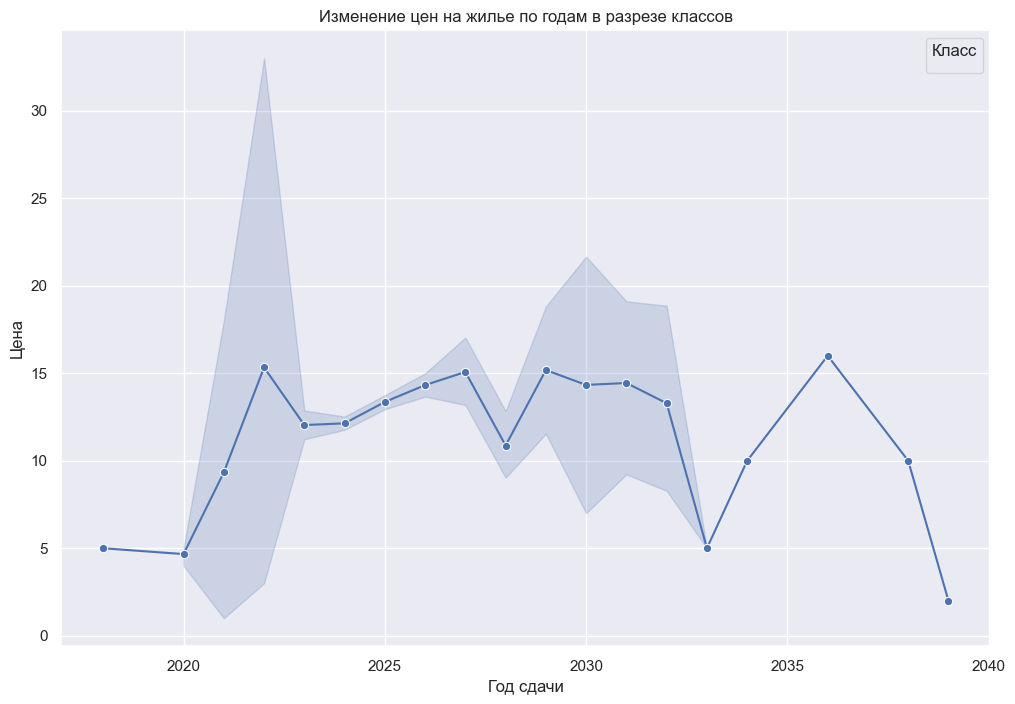

In [1172]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='date', y='objFloorCnt',  data=t3, marker='o')
plt.title('Изменение цен на жилье по годам в разрезе классов')
plt.xlabel('Год сдачи')
plt.ylabel('Цена')
plt.legend(title='Класс')
plt.show()